Use this cell for all your imports

In [12]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
from scipy.sparse import coo_matrix, csr_matrix
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [3]:
data = np.loadtxt('data.txt', dtype=int)
data

array([[   1001, 9304045],
       [   1001, 9308122],
       [   1001, 9309097],
       ...,
       [9912286, 9808140],
       [9912286, 9810068],
       [9912286, 9901023]])

Use this cell to normalize the matrix as you see fit.

In [5]:
num_nodes = data.max()

adj_matrix = csr_matrix((np.ones(len(data)), (data[:, 0]-1, data[:, 1]-1)), shape=(num_nodes, num_nodes))

print(adj_matrix)

  (1000, 9304044)	1.0
  (1000, 9308121)	1.0
  (1000, 9309096)	1.0
  (1000, 9311041)	1.0
  (1000, 9401138)	1.0
  (1000, 9404150)	1.0
  (1000, 9407086)	1.0
  (1000, 9408098)	1.0
  (1000, 9501029)	1.0
  (1000, 9503123)	1.0
  (1000, 9504089)	1.0
  (1000, 9504144)	1.0
  (1000, 9505024)	1.0
  (1000, 9505053)	1.0
  (1000, 9505104)	1.0
  (1000, 9505161)	1.0
  (1000, 9506047)	1.0
  (1000, 9506111)	1.0
  (1000, 9506143)	1.0
  (1000, 9507049)	1.0
  (1000, 9507157)	1.0
  (1000, 9508093)	1.0
  (1000, 9508154)	1.0
  (1000, 9510141)	1.0
  (1000, 9510224)	1.0
  :	:
  (9912290, 9802148)	1.0
  (9912290, 9908148)	1.0
  (9912290, 9912101)	1.0
  (9912291, 9406216)	1.0
  (9912291, 9606138)	1.0
  (9912291, 9608176)	1.0
  (9912291, 9702162)	1.0
  (9912291, 9702201)	1.0
  (9912291, 9707060)	1.0
  (9912291, 9710128)	1.0
  (9912291, 9711115)	1.0
  (9912291, 9711202)	1.0
  (9912291, 9811021)	1.0
  (9912291, 9811129)	1.0
  (9912291, 9811231)	1.0
  (9912291, 9811243)	1.0
  (9912291, 9901002)	1.0
  (9912291, 9904108

Apply the PageRank algorithm to the matrix you created.

In [9]:
eigenvalues, eigenvectors = eigsh(adj_matrix, k=1, which='LM')
pagerank_scores = eigenvectors.flatten()
top_nodes = sorted(enumerate(pagerank_scores), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_nodes:
    print(f"Node: {node+1}, Score: {score:.6f}")

Node: 205187, Score: 0.048880
Node: 201210, Score: 0.047103
Node: 109122, Score: 0.046787
Node: 204112, Score: 0.045369
Node: 208018, Score: 0.042434
Node: 212047, Score: 0.041859
Node: 211012, Score: 0.039008
Node: 202193, Score: 0.033107
Node: 203235, Score: 0.031759
Node: 203227, Score: 0.031694


Output a list of the 100 most important papers along with their importance

In [10]:
top_papers = sorted(enumerate(pagerank_scores), key=lambda x: x[1], reverse=True)[:100]
for paper, score in top_papers:
    print(f"Paper ID: {paper+1}, Importance: {score:.6f}")

Paper ID: 205187, Importance: 0.048880
Paper ID: 201210, Importance: 0.047103
Paper ID: 109122, Importance: 0.046787
Paper ID: 204112, Importance: 0.045369
Paper ID: 208018, Importance: 0.042434
Paper ID: 212047, Importance: 0.041859
Paper ID: 211012, Importance: 0.039008
Paper ID: 202193, Importance: 0.033107
Paper ID: 203235, Importance: 0.031759
Paper ID: 203227, Importance: 0.031694
Paper ID: 303034, Importance: 0.030300
Paper ID: 212055, Importance: 0.030276
Paper ID: 203208, Importance: 0.030258
Paper ID: 205251, Importance: 0.030116
Paper ID: 304072, Importance: 0.030027
Paper ID: 303199, Importance: 0.029812
Paper ID: 203191, Importance: 0.029486
Paper ID: 201174, Importance: 0.027624
Paper ID: 201197, Importance: 0.027527
Paper ID: 302008, Importance: 0.026876
Paper ID: 112226, Importance: 0.026744
Paper ID: 112152, Importance: 0.025847
Paper ID: 204138, Importance: 0.025174
Paper ID: 208009, Importance: 0.024882
Paper ID: 210046, Importance: 0.024875
Paper ID: 204083, Importa

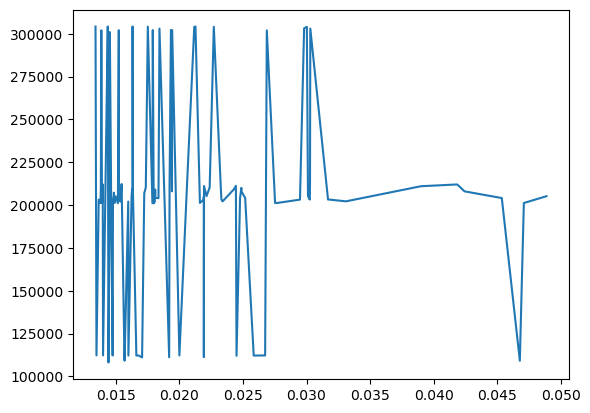

In [31]:
x_values = [t[0] for t in top_papers]
y_values = [t[1] for t in top_papers]

# Tracer le graphique
plt.plot(y_values,x_values)
plt.show()

Visualize your results

TypeError: 'list' object cannot be interpreted as an integer

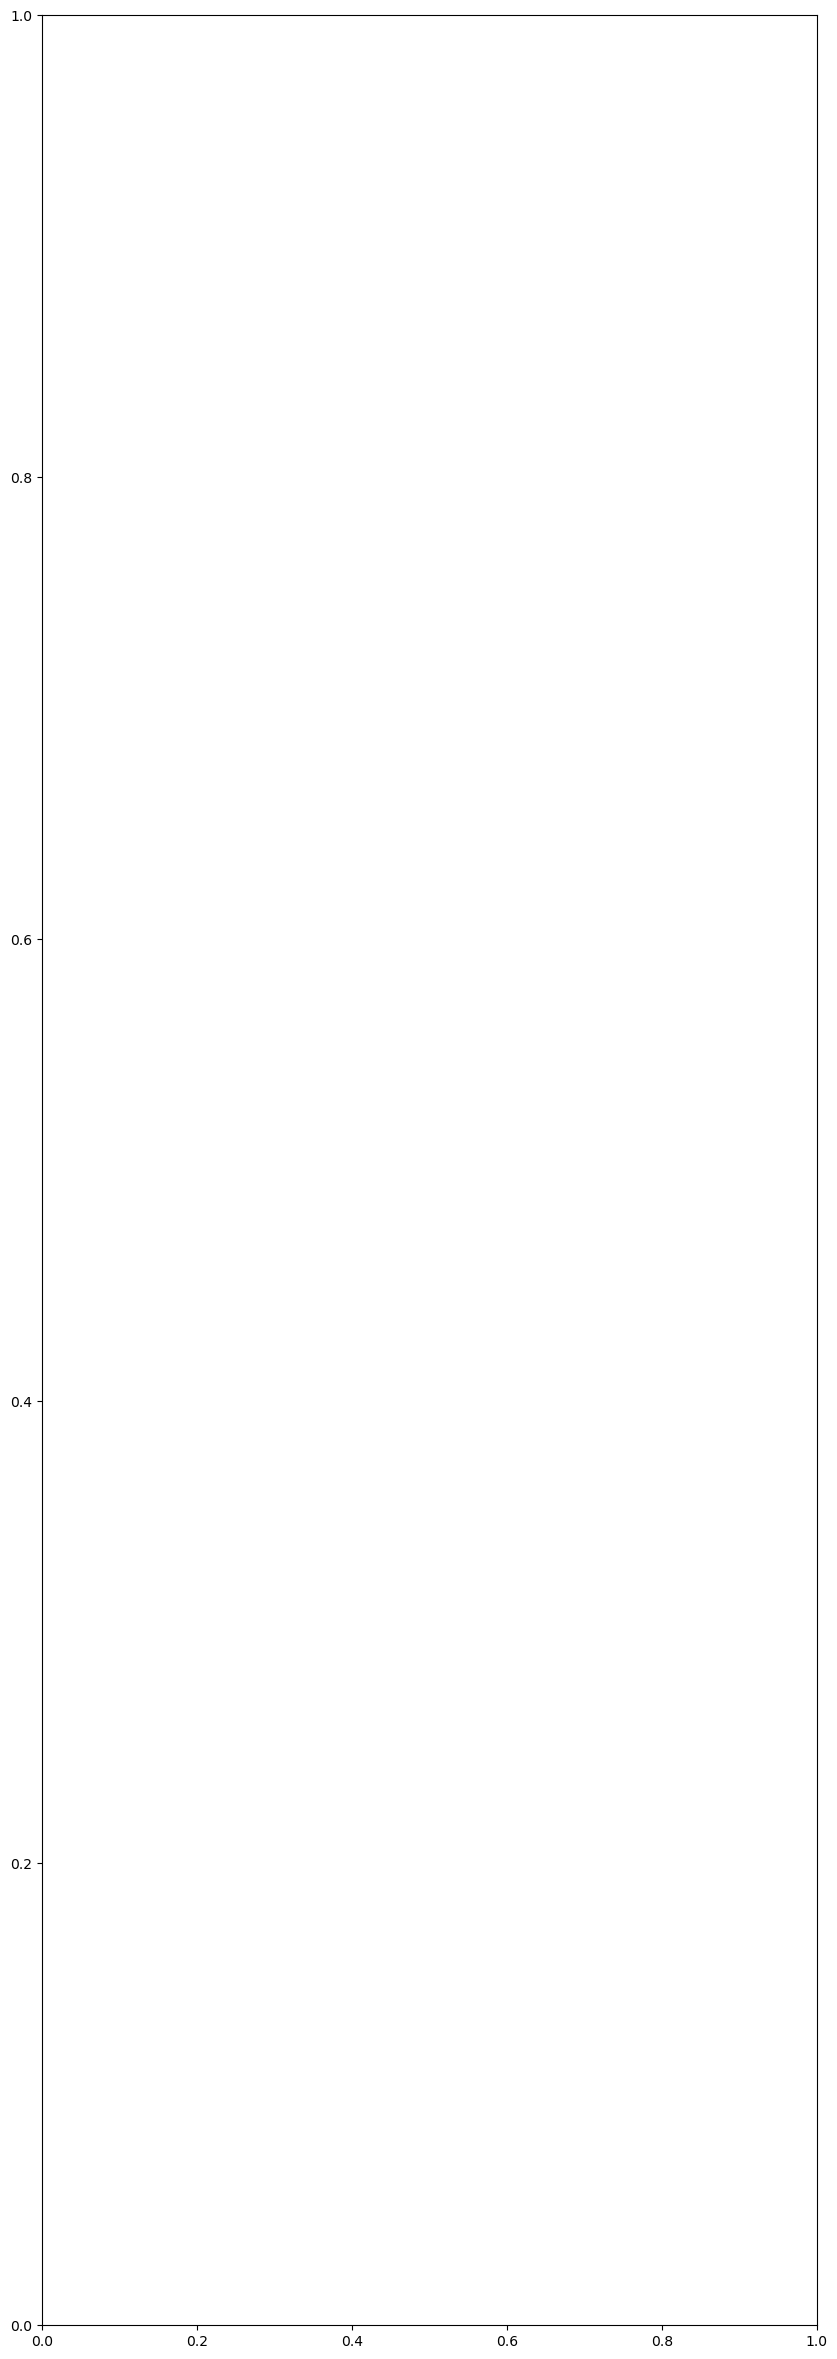

In [32]:
fig, ax = plt.subplots(figsize=(10, 30))
ax.barh(range(x_values), y_values, align='center', color='skyblue')
ax.set_yticks(range(x_values))
ax.set_yticklabels((top_papers))
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel('Importance score')
ax.set_title('Top 100 papers by importance score')

plt.show()